In [99]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns
sns.set_theme()
sns.set_palette("vlag")

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

import xgboost as xgb


In [70]:
total = pd.read_csv('../data/DataFrames/total', sep = ',', index_col = 0 )
total_stats = pd.read_csv('../data/DataFrames/total_stats', sep = ',', index_col = 0 )
total_j = pd.read_csv('../data/DataFrames/total_j', sep = ',', index_col = 0)
G = pd.read_csv('../data/DataFrames/G',sep = ',', index_col = 0)
G_j = pd.read_csv('../data/DataFrames/G_j', sep = ',', index_col = 0)
D = pd.read_csv('../data/DataFrames/D',sep = ',', index_col = 0)
D_j = pd.read_csv('../data/DataFrames/D_j', sep = ',', index_col = 0)
M = pd.read_csv('../data/DataFrames/M',sep = ',', index_col = 0)
M_j = pd.read_csv('../data/DataFrames/M_j', sep = ',', index_col = 0)
A = pd.read_csv('../data/DataFrames/A',sep = ',', index_col = 0)
A_j = pd.read_csv('../data/DataFrames/A_j', sep = ',', index_col = 0)


In [71]:
total.head()

,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,...,G.,N.,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range
Joueur,,,,,,,,,,,,,,,,,,,,,
Mbappé Kylian,A,49.0,111.0,6.12,4.50,6.37,17,1,35,1.31,...,15,2,2,48,14,34,62.0,1 - 1-5,4 - entre 6 et 8,5 - 80 et plus
Neymar,A,41.0,70.0,6.38,4.50,6.31,17,2,29,1.40,...,15,2,2,48,14,34,29.0,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
Messi Lionel,A,40.0,76.0,7.03,6.00,6.68,15,2,31,1.25,...,15,2,2,48,14,34,36.0,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
Hakimi Achraf,DL,21.0,28.0,5.38,4.50,5.44,17,1,32,1.19,...,15,2,2,48,14,34,7.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40
Ekitike Hugo,MO,13.0,13.0,5.04,5.67,5.17,13,6,21,1.09,...,15,2,2,48,14,34,0.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20


In [3]:
total_j.head()

,Note,Note 1 an,j1,j2,j3,j4,j5,j6,j7,j8,j9,j10,j11,j12,j13,j14,j15,j16,j17,j18,j19,j20,j21,j22,j23,j24,j25,j26,j27,j28,j29,j30,j31,j32,j33,j34,j35,j36,j37,j38
Joueur,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mbappé Kylian,6.12,6.37,6.12,7.0,9.00,4.50,6.5,7.5,5.0,5.00,6.0,5.00,7.00,8.00,6.00,5.00,6.5,6.50,5.00,6.12,4.5,5.00,7.00,6.50,6.50,6.00,5.0,8.00,6.12,7.00,3.50,9.00,9.00,5.00,7.00,4.00,8.00,6.0,8.00,8.5
Neymar,6.38,6.31,9.00,7.5,9.00,6.50,6.5,6.0,6.5,6.00,5.0,4.50,6.50,6.38,7.50,7.50,5.5,6.00,6.38,4.50,4.5,6.38,6.38,6.38,6.38,6.38,4.5,5.50,4.50,6.00,4.00,8.00,9.00,7.00,6.38,6.00,6.50,6.5,6.38,7.0
Messi Lionel,7.03,6.68,9.00,7.0,8.00,5.00,8.0,8.0,7.5,8.00,7.0,7.03,5.50,8.00,7.00,7.03,5.5,7.03,7.03,7.00,5.0,7.03,7.03,5.50,8.00,6.00,6.0,7.50,4.00,6.00,7.03,6.50,8.00,4.50,7.03,7.00,5.50,5.0,8.00,8.0
Hakimi Achraf,5.38,5.44,7.50,7.0,7.50,5.00,4.5,5.0,5.5,5.00,4.0,5.00,6.00,4.00,5.38,5.00,7.0,5.00,4.00,5.38,4.5,5.38,5.38,5.38,5.50,6.00,5.0,5.38,5.38,6.50,3.50,5.50,5.50,5.00,6.50,5.00,6.00,5.0,5.00,6.0
Ekitike Hugo,5.04,5.17,4.00,4.5,5.04,5.04,4.5,4.5,4.5,5.04,5.0,5.04,5.04,4.50,5.04,6.00,7.0,4.00,6.00,7.00,4.0,5.04,5.04,3.00,7.00,5.00,4.5,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.0,6.00,6.0


In [4]:
#Lorsqu'un joueur n'a pas joué lors d'un match, sa note est de zéro, il faut donc traiter cette donnée en la remplacant par la moyenne du joueur (la 'Note')
total_j_mean = total_j.replace(to_replace = 0.0,
                  value = np.nan)

total_j_mean = total_j_mean.apply(lambda x: x.fillna(value=total_j['Note']))

G_j_mean = G_j.replace(to_replace = 0.0,
                  value = np.nan)

G_j_mean = G_j_mean.apply(lambda x: x.fillna(value=G_j['Note']))


D_j_mean = D_j.replace(to_replace = 0.0,
                  value = np.nan)
D_j_mean = D_j_mean.apply(lambda x: x.fillna(value=D_j['Note']))


M_j_mean = M_j.replace(to_replace = 0.0,
                  value = np.nan)
M_j_mean = M_j_mean.apply(lambda x: x.fillna(value=M_j['Note']))


A_j_mean = A_j.replace(to_replace = 0.0,
                  value = np.nan)
A_j_mean = A_j_mean.apply(lambda x: x.fillna(value=A_j['Note']))


#Au lieu de la moyenne, n peut également remplacer les NaN par la note du précédent match.
total_j_last = total_j.replace(to_replace = 0.0,
                  value = np.nan)

total_j_last = total_j_last.fillna(method="ffill", axis=1)

G_j_last = G_j.replace(to_replace = 0.0,
                  value = np.nan)

G_j_last = G_j_last.fillna(method="ffill", axis=1)


D_j_last = D_j.replace(to_replace = 0.0,
                  value = np.nan)
D_j_last = D_j_last.fillna(method="ffill", axis=1)


M_j_last = M_j.replace(to_replace = 0.0,
                  value = np.nan)
M_j_last = M_j_last.fillna(method="ffill", axis=1)


A_j_last = A_j.replace(to_replace = 0.0,
                  value = np.nan)
A_j_last = A_j_last.fillna(method="ffill", axis=1)

#Au lieu de la moyenne, n peut également remplacer les NaN par la note du précédent match.


In [5]:
total_j_mean.head()

,Note,Note 1 an,j1,j2,j3,j4,j5,j6,j7,j8,j9,j10,j11,j12,j13,j14,j15,j16,j17,j18,j19,j20,j21,j22,j23,j24,j25,j26,j27,j28,j29,j30,j31,j32,j33,j34,j35,j36,j37,j38
Joueur,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mbappé Kylian,6.12,6.37,6.12,7.0,9.00,4.50,6.5,7.5,5.0,5.00,6.0,5.00,7.00,8.00,6.00,5.00,6.5,6.50,5.00,6.12,4.5,5.00,7.00,6.50,6.50,6.00,5.0,8.00,6.12,7.00,3.50,9.00,9.00,5.00,7.00,4.00,8.00,6.0,8.00,8.5
Neymar,6.38,6.31,9.00,7.5,9.00,6.50,6.5,6.0,6.5,6.00,5.0,4.50,6.50,6.38,7.50,7.50,5.5,6.00,6.38,4.50,4.5,6.38,6.38,6.38,6.38,6.38,4.5,5.50,4.50,6.00,4.00,8.00,9.00,7.00,6.38,6.00,6.50,6.5,6.38,7.0
Messi Lionel,7.03,6.68,9.00,7.0,8.00,5.00,8.0,8.0,7.5,8.00,7.0,7.03,5.50,8.00,7.00,7.03,5.5,7.03,7.03,7.00,5.0,7.03,7.03,5.50,8.00,6.00,6.0,7.50,4.00,6.00,7.03,6.50,8.00,4.50,7.03,7.00,5.50,5.0,8.00,8.0
Hakimi Achraf,5.38,5.44,7.50,7.0,7.50,5.00,4.5,5.0,5.5,5.00,4.0,5.00,6.00,4.00,5.38,5.00,7.0,5.00,4.00,5.38,4.5,5.38,5.38,5.38,5.50,6.00,5.0,5.38,5.38,6.50,3.50,5.50,5.50,5.00,6.50,5.00,6.00,5.0,5.00,6.0
Ekitike Hugo,5.04,5.17,4.00,4.5,5.04,5.04,4.5,4.5,4.5,5.04,5.0,5.04,5.04,4.50,5.04,6.00,7.0,4.00,6.00,7.00,4.0,5.04,5.04,3.00,7.00,5.00,4.5,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.0,6.00,6.0


In [6]:
oneh = OneHotEncoder()

total_poste_club = total[['Poste','Club']]
total_poste_club.head()

cols_oneh = ['Poste', 'Club']
encoded_cols = oneh.fit_transform(total_poste_club[cols_oneh])
encoded_cols_df = pd.DataFrame(encoded_cols.toarray(), columns=oneh.get_feature_names_out(cols_oneh),index=total_poste_club.index)
total_j_club_pos = total_j_mean.merge(encoded_cols_df, left_index=True, right_index=True)
total_j_club_pos.head()

,Note,Note 1 an,j1,j2,j3,j4,j5,j6,j7,j8,j9,j10,j11,j12,j13,j14,j15,j16,j17,j18,j19,j20,j21,j22,j23,j24,j25,j26,j27,j28,j29,j30,j31,j32,j33,j34,j35,j36,j37,j38,Poste_A,Poste_DC,Poste_DL,Poste_G,Poste_MD,Poste_MO,Club_AC Ajaccio,Club_AJ Auxerre,Club_AS Monaco,Club_Almería,Club_Amiens SC,Club_Angers SCO,Club_Arsenal,Club_Aston Villa,Club_Atalanta,Club_Athletic,Club_Atlético,Club_Barcelona,Club_Betis,Club_Bologna,Club_Bordeaux,Club_Bournemouth,Club_Brentford,Club_Brest,Club_Brighton,Club_Celta,Club_Chelsea,Club_Clermont,Club_Cremonese,Club_Crystal Palace,Club_Cádiz,Club_Dijon FCO,Club_Elche,Club_Empoli,Club_Espanyol,Club_Everton,Club_FC Annecy,Club_FC Lorient,Club_FC Metz,Club_FC Nantes,Club_Fiorentina,Club_Fulham,Club_Getafe,Club_Girona,Club_Grenoble,Club_Guingamp,Club_Havre AC,Club_Inter,Club_Juventus,Club_LOSC,Club_Laval,Club_Lazio,Club_Lecce,Club_Leeds,Club_Leicester,Club_Liverpool,Club_Mallorca,Club_Man. City,Club_Man. United,Club_Milan,Club_Montpellier,Club_Monza,Club_Napoli,Club_Newcastle,Club_Nimes O.,Club_Niort,Club_Nottingham Forest,Club_OGC Nice,Club_OL,Club_OM,Club_Osasuna,Club_Paris FC,Club_Paris SG,Club_Pau FC,Club_Quevilly RM,Club_RC Lens,Club_Rayo Vallecano,Club_Real Madrid,Club_Real Sociedad,Club_Reims,Club_Rennes,Club_Rodez AF,Club_Roma,Club_SC Bastia,Club_SM Caen,Club_Saint-Étienne,Club_Salernitana,Club_Sampdoria,Club_Sassuolo,Club_Sevilla,Club_Sochaux,Club_Southampton,Club_Spezia,Club_Strasbourg,Club_Torino,Club_Tottenham,Club_Toulouse FC,Club_Troyes,Club_Udinese,Club_Valencia,Club_Valenciennes,Club_Valladolid,Club_Verona,Club_Villarreal,Club_West Ham,Club_Wolverhampton
Joueur,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaneba Ismaël,5.18,5.16,5.18,5.18,4.50,6.50,5.5,5.0,5.50,6.00,5.5,4.0,4.5,6.00,4.0,5.00,6.00,6.0,4.0,5.0,5.0,5.50,6.0,6.00,5.00,5.00,5.18,5.18,6.00,3.50,3.50,5.50,5.18,6.00,5.18,5.18,5.00,5.50,5.00,4.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaronson Brenden,5.11,5.11,5.00,4.50,7.50,5.00,6.0,4.0,5.11,5.11,5.0,5.0,5.0,5.50,6.0,5.50,4.50,6.0,4.0,5.0,3.5,4.50,5.5,5.11,5.11,5.11,5.11,5.11,5.11,5.11,5.11,5.11,5.11,5.11,5.11,5.11,5.11,5.11,5.11,5.11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abdallah Akim,4.86,4.92,5.00,4.50,5.00,5.00,6.0,3.5,5.00,6.00,6.5,4.0,5.0,4.00,3.5,4.86,6.00,4.5,6.0,4.5,3.5,5.50,5.0,6.00,5.00,4.00,4.86,4.86,6.00,5.00,4.86,5.00,4.50,4.86,4.86,4.86,4.86,5.00,5.00,4.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abdelhamid Yunis,4.89,4.84,2.00,3.00,4.50,5.00,5.0,5.0,4.50,3.50,5.0,6.0,5.5,6.50,5.0,6.00,6.00,5.0,4.0,6.0,5.5,4.89,4.5,3.50,6.00,3.50,4.89,4.89,4.00,6.50,5.50,4.50,3.50,4.89,6.00,4.50,5.00,5.00,5.50,3.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [7]:
total_j_last.shape

(2359, 40)

In [8]:
saison = ['Note', 'Note 1 an','j1','j2','j3','j4','j5','j6','j7','j8','j9','j10','j11','j12','j13',
            'j14','j15','j16','j17','j18','j19']

total_j_saison_m = total_j_mean[saison]
total_j_saison_l = total_j_last[saison]

In [9]:
from pycaret.regression import *

exp_mean = setup(data = total_j_mean, target = 'j19', session_id = 123)


,Description,Value
0,Session id,123
1,Target,j19
2,Target type,Regression
3,Original data shape,"(2367, 40)"
4,Transformed data shape,"(2415, 40)"
5,Transformed train set shape,"(1695, 40)"
6,Transformed test set shape,"(720, 40)"
7,Numeric features,39
8,Preprocess,True
9,Imputation type,simple


In [10]:
best_model_mean = exp_mean.compare_models()
print(best_model_mean)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2440,0.1729,0.4121,0.7409,0.0703,0.0494,1.9040
br,Bayesian Ridge,0.2449,0.1730,0.4123,0.7408,0.0703,0.0496,1.0930
huber,Huber Regressor,0.2347,0.2050,0.4474,0.6922,0.0761,0.0474,1.0730
ridge,Ridge Regression,0.2820,0.2057,0.4514,0.6913,0.0762,0.0578,1.0830
et,Extra Trees Regressor,0.4218,0.4788,0.6902,0.2804,0.1148,0.0873,1.1070
rf,Random Forest Regressor,0.4311,0.4834,0.6936,0.2721,0.1151,0.0888,1.1000
lightgbm,Light Gradient Boosting Machine,0.4652,0.4965,0.7032,0.2521,0.1165,0.0952,1.0860
gbr,Gradient Boosting Regressor,0.4396,0.4990,0.7051,0.2486,0.1170,0.0905,1.0760
ada,AdaBoost Regressor,0.4718,0.5100,0.7125,0.2326,0.1189,0.0979,1.0810
xgboost,Extreme Gradient Boosting,0.4815,0.5334,0.7287,0.1964,0.1203,0.0985,1.0930


LinearRegression(n_jobs=-1)


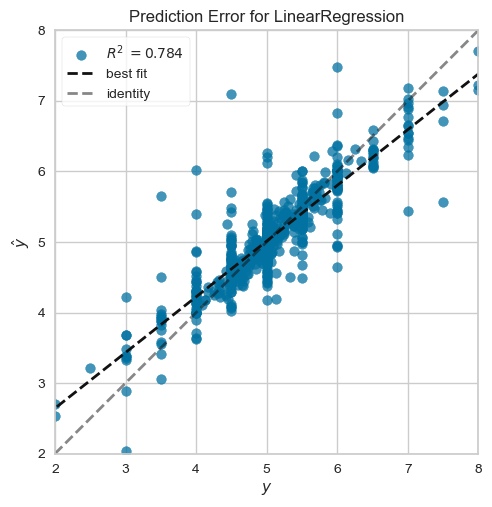

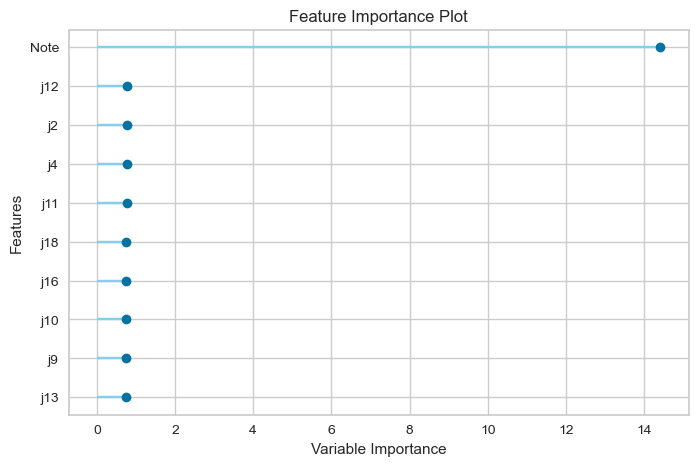

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.2108,0.1228,0.3504,0.7838,0.0591,0.0437


,Note,Note 1 an,j1,j2,j3,j4,j5,j6,j7,j8,...,j31,j32,j33,j34,j35,j36,j37,j38,j19,prediction_label
Joueur,,,,,,,,,,,,,,,,,,,,,
Muyumba Tristan,5.11,5.15,7.00,5.00,5.50,4.00,6.00,4.50,5.00,6.0,...,5.11,5.00,5.00,5.00,7.00,6.00,5.00,5.00,4.50,4.771524
Obiang Pedro,5.13,5.13,5.13,5.13,5.13,5.13,5.13,5.13,5.13,5.0,...,5.13,5.13,5.13,5.13,5.13,5.13,5.13,5.13,5.50,5.399775
Dendoncker Leander,5.20,5.23,6.50,5.50,5.00,5.00,5.20,5.20,5.20,5.0,...,6.00,5.20,4.50,5.00,4.00,4.50,5.20,4.50,5.00,4.892467
Désiré Doué Désiré,5.35,5.35,5.50,5.00,4.50,5.00,6.50,5.00,6.50,5.0,...,5.35,5.35,5.35,5.35,5.35,5.35,5.35,5.35,5.00,5.145827
Gravillon Andreaw,4.85,4.80,3.50,3.50,5.00,5.00,5.50,6.00,4.50,4.5,...,4.85,5.50,5.50,4.50,5.50,4.00,5.00,4.85,4.85,5.044378
White Ben,5.42,5.17,6.00,4.50,6.00,5.00,5.50,3.50,5.42,5.5,...,4.00,4.00,4.50,5.00,5.42,5.42,4.00,5.42,5.00,4.993586
Mathias Pereira Lage Mathias,5.11,5.10,4.00,5.00,6.00,3.50,4.00,5.00,5.00,5.5,...,5.00,5.11,5.11,5.11,5.00,7.00,5.00,7.00,5.11,5.095393
Morales José,4.68,5.19,4.50,4.50,4.50,6.50,4.50,5.00,4.50,4.5,...,5.50,8.00,5.50,7.00,6.00,3.00,7.00,7.00,4.68,4.446740
Bonnet Ugo,4.89,4.88,4.00,5.00,4.50,5.00,5.00,5.00,6.50,5.0,...,5.00,5.00,4.50,3.50,4.50,5.00,6.00,6.00,4.00,4.595538


In [11]:
exp_mean.plot_model(best_model_mean, plot = 'error')
exp_mean.plot_model(best_model_mean, plot = 'feature')
exp_mean.predict_model(best_model_mean).head(10)

In [12]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2160,0.1086,0.3296,0.8161,0.0565,0.0445
1,0.2601,0.2038,0.4515,0.6845,0.0679,0.0495
2,0.2546,0.1647,0.4058,0.7556,0.0672,0.0527
3,0.2712,0.2518,0.5018,0.6126,0.0747,0.0509
4,0.2313,0.1552,0.3940,0.8015,0.0706,0.0497
5,0.2172,0.1299,0.3603,0.7711,0.0582,0.0425
6,0.2667,0.2497,0.4997,0.6616,0.1049,0.0555
7,0.2292,0.1550,0.3937,0.7694,0.0707,0.0486
8,0.2267,0.1257,0.3545,0.7868,0.0616,0.0478


In [13]:
predict_model(lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.2108,0.1228,0.3504,0.7838,0.0591,0.0437


In [14]:
final_lr = finalize_model(lr)
print(final_lr)

Pipeline(memory=FastMemory(location=C:\Users\flo-6\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Note', 'Note 1 an', 'j1', 'j2',
                                             'j3', 'j4', 'j5', 'j6', 'j7', 'j8',
                                             'j9', 'j10', 'j11', 'j12', 'j13',
                                             'j14', 'j15', 'j16', 'j17', 'j18',
                                             'j20', 'j21', 'j22', 'j23', 'j24',
                                             'j25', 'j26', 'j27', 'j28', 'j29', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator', LinearR

In [15]:
predict_model(final_lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.1966,0.1107,0.3328,0.8049,0.0565,0.0409


In [16]:
total_j_mean_predictions = predict_model(final_lr, data = total_j_mean)
total_j_mean_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.2191,0.1443,0.3799,0.7753,0.0652,0.0447


,Note,Note 1 an,j1,j2,j3,j4,j5,j6,j7,j8,...,j31,j32,j33,j34,j35,j36,j37,j38,j19,prediction_label
Joueur,,,,,,,,,,,,,,,,,,,,,
Aaneba Ismaël,5.18,5.16,5.18,5.18,4.50,6.50,5.50,5.00,5.50,6.00,...,5.18,6.00,5.18,5.18,5.00,5.50,5.00,4.50,5.00,5.067457
Aaronson Brenden,5.11,5.11,5.00,4.50,7.50,5.00,6.00,4.00,5.11,5.11,...,5.11,5.11,5.11,5.11,5.11,5.11,5.11,5.11,3.50,3.850229
Abdallah Akim,4.86,4.92,5.00,4.50,5.00,5.00,6.00,3.50,5.00,6.00,...,4.50,4.86,4.86,4.86,4.86,5.00,5.00,4.00,3.50,3.847183
Abdelhamid Yunis,4.89,4.84,2.00,3.00,4.50,5.00,5.00,5.00,4.50,3.50,...,3.50,4.89,6.00,4.50,5.00,5.00,5.50,3.50,5.50,5.218636
Abdelli Himad,5.45,5.59,5.45,5.45,5.45,5.45,5.00,5.00,5.45,5.45,...,5.00,8.00,5.50,6.00,6.00,5.00,5.45,5.45,5.00,5.118223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Özkacar Cenk,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.33,...,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.343113
Ødegaard Martin,6.44,6.00,6.00,6.00,7.50,7.50,6.00,4.50,6.44,6.44,...,3.00,6.00,5.50,6.00,5.00,6.00,5.50,7.50,5.00,5.238701
Østigård Leo,5.00,4.78,5.00,5.00,5.00,5.50,5.00,5.00,5.00,5.00,...,5.00,3.50,4.00,5.50,4.50,6.00,4.50,5.00,5.00,4.761221


In [17]:
save_model(final_lr,'Final lr 01')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\flo-6\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Note', 'Note 1 an', 'j1', 'j2',
                                              'j3', 'j4', 'j5', 'j6', 'j7', 'j8',
                                              'j9', 'j10', 'j11', 'j12', 'j13',
                                              'j14', 'j15', 'j16', 'j17', 'j18',
                                              'j20', 'j21', 'j22', 'j23', 'j24',
                                              'j25', 'j26', 'j27', 'j28', 'j29', ...],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_esti

In [18]:
saved_final_lr = load_model('Final lr 01')

Transformation Pipeline and Model Successfully Loaded


In [19]:
predictions = predict_model(saved_final_lr, data=total_j_mean)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.2191,0.1443,0.3799,0.7753,0.0652,0.0447


In [20]:
predictions.to_csv('../data/DataFrames/predictions', index=True)

In [21]:
predictions = pd.read_csv('../data/DataFrames/predictions', index_col='Joueur')
total = pd.read_csv('../data/DataFrames/total', sep = ',', index_col = 0 )
total = total[['Poste','Championnat']]
predictions

,Note,Note 1 an,j1,j2,j3,j4,j5,j6,j7,j8,...,j31,j32,j33,j34,j35,j36,j37,j38,j19,prediction_label
Joueur,,,,,,,,,,,,,,,,,,,,,
Aaneba Ismaël,5.18,5.16,5.18,5.18,4.50,6.50,5.50,5.00,5.50,6.00,...,5.18,6.00,5.18,5.18,5.00,5.50,5.00,4.50,5.00,5.067457
Aaronson Brenden,5.11,5.11,5.00,4.50,7.50,5.00,6.00,4.00,5.11,5.11,...,5.11,5.11,5.11,5.11,5.11,5.11,5.11,5.11,3.50,3.850229
Abdallah Akim,4.86,4.92,5.00,4.50,5.00,5.00,6.00,3.50,5.00,6.00,...,4.50,4.86,4.86,4.86,4.86,5.00,5.00,4.00,3.50,3.847183
Abdelhamid Yunis,4.89,4.84,2.00,3.00,4.50,5.00,5.00,5.00,4.50,3.50,...,3.50,4.89,6.00,4.50,5.00,5.00,5.50,3.50,5.50,5.218636
Abdelli Himad,5.45,5.59,5.45,5.45,5.45,5.45,5.00,5.00,5.45,5.45,...,5.00,8.00,5.50,6.00,6.00,5.00,5.45,5.45,5.00,5.118223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Özkacar Cenk,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.33,...,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.343113
Ødegaard Martin,6.44,6.00,6.00,6.00,7.50,7.50,6.00,4.50,6.44,6.44,...,3.00,6.00,5.50,6.00,5.00,6.00,5.50,7.50,5.00,5.238701
Østigård Leo,5.00,4.78,5.00,5.00,5.00,5.50,5.00,5.00,5.00,5.00,...,5.00,3.50,4.00,5.50,4.50,6.00,4.50,5.00,5.00,4.761221


In [22]:
predictions = predictions.merge(right = total, on = 'Joueur', how = 'left')
predictions.shape

(2383, 43)

In [23]:
predictions['Championnat'].value_counts()

Serie A            488
Premiere League    480
Ligue 2            474
Liga               473
Ligue 1            468
Name: Championnat, dtype: int64

In [24]:
predictions = predictions.sort_values(by = 'prediction_label', ascending = False)
#predictions.to_csv('../data/DataFrames/predictions', index=True)

In [25]:
predictions_liga_G = predictions[(predictions['Championnat']=='Liga')&(predictions['Poste'] == 'G')]
predictions_liga_G['Terrain'] = 'G'
predictions_liga_D = predictions[(predictions['Championnat']=='Liga')&((predictions['Poste'] == 'DC')|(predictions['Poste'] == 'DL'))]
predictions_liga_D['Terrain'] = 'D'
predictions_liga_M = predictions[(predictions['Championnat']=='Liga')&((predictions['Poste'] == 'MD')|(predictions['Poste'] == 'MO'))]
predictions_liga_M['Terrain'] = 'M'
predictions_liga_A = predictions[(predictions['Championnat']=='Liga')&(predictions['Poste'] == 'A')]
predictions_liga_A['Terrain'] = 'A'

In [26]:
predictions_liga_G.to_csv('../data/DataFrames/PREDICTIONS_LIGA/predictions_liga_G', index=True)
predictions_liga_D.to_csv('../data/DataFrames/PREDICTIONS_LIGA/predictions_liga_D', index=True)
predictions_liga_M.to_csv('../data/DataFrames/PREDICTIONS_LIGA/predictions_liga_M', index=True)
predictions_liga_A.to_csv('../data/DataFrames/PREDICTIONS_LIGA/predictions_liga_A', index=True)

In [27]:
predictions_ligue1_G = predictions[(predictions['Championnat']=='Ligue 1')&(predictions['Poste'] == 'G')]
predictions_ligue1_G['Terrain'] = 'G'
predictions_ligue1_D = predictions[(predictions['Championnat']=='Ligue 1')&((predictions['Poste'] == 'DC')|(predictions['Poste'] == 'DL'))]
predictions_ligue1_D['Terrain'] = 'D'
predictions_ligue1_M = predictions[(predictions['Championnat']=='Ligue 1')&((predictions['Poste'] == 'MD')|(predictions['Poste'] == 'MO'))]
predictions_ligue1_M['Terrain'] = 'M'
predictions_ligue1_A = predictions[(predictions['Championnat']=='Ligue 1')&(predictions['Poste'] == 'A')]
predictions_ligue1_A['Terrain'] = 'A'

In [28]:
predictions_ligue1_G.to_csv('../data/DataFrames/PREDICTIONS_LIGUE_1/predictions_ligue_1_G', index=True)
predictions_ligue1_D.to_csv('../data/DataFrames/PREDICTIONS_LIGUE_1/predictions_ligue_1_D', index=True)

predictions_ligue1_M.to_csv('../data/DataFrames/PREDICTIONS_LIGUE_1/predictions_ligue_1_M', index=True)

predictions_ligue1_A.to_csv('../data/DataFrames/PREDICTIONS_LIGUE_1/predictions_ligue_1_A', index=True)

In [29]:
predictions_ligue2_G = predictions[(predictions['Championnat']=='Ligue 2')&(predictions['Poste'] == 'G')]
predictions_ligue2_G['Terrain'] = 'G'
predictions_ligue2_D = predictions[(predictions['Championnat']=='Ligue 2')&((predictions['Poste'] == 'DC')|(predictions['Poste'] == 'DL'))]
predictions_ligue2_D['Terrain'] = 'D'
predictions_ligue2_M = predictions[(predictions['Championnat']=='Ligue 2')&((predictions['Poste'] == 'MD')|(predictions['Poste'] == 'MO'))]
predictions_ligue2_M['Terrain'] = 'M'
predictions_ligue2_A = predictions[(predictions['Championnat']=='Ligue 2')&(predictions['Poste'] == 'A')]
predictions_ligue2_A['Terrain'] = 'A'

In [30]:
predictions_ligue2_G.to_csv('../data/DataFrames/PREDICTIONS_LIGUE_2/predictions_ligue_2_G', index=True)
predictions_ligue2_D.to_csv('../data/DataFrames/PREDICTIONS_LIGUE_2/predictions_ligue_2_D', index=True)
predictions_ligue2_M.to_csv('../data/DataFrames/PREDICTIONS_LIGUE_2/predictions_ligue_2_M', index=True)
predictions_ligue2_A.to_csv('../data/DataFrames/PREDICTIONS_LIGUE_2/predictions_ligue_2_A', index=True)

In [31]:
predictions_Premier_league_G = predictions[(predictions['Championnat']=='Premiere League')&(predictions['Poste'] == 'G')]
predictions_Premier_league_G['Terrain'] = 'G'
predictions_Premier_league_D = predictions[(predictions['Championnat']=='Premiere League')&((predictions['Poste'] == 'DC')|(predictions['Poste'] == 'DL'))]
predictions_Premier_league_D['Terrain'] = 'D'
predictions_Premier_league_M = predictions[(predictions['Championnat']=='Premiere League')&((predictions['Poste'] == 'MD')|(predictions['Poste'] == 'MO'))]
predictions_Premier_league_M['Terrain'] = 'M'
predictions_Premier_league_A = predictions[(predictions['Championnat']=='Premiere League')&(predictions['Poste'] == 'A')]
predictions_Premier_league_A['Terrain'] = 'A'

In [32]:
predictions_Premier_league_G.to_csv('../data/DataFrames/PREDICTIONS_PREMIER_LEAGUE/predictions_Premier_league_G', index=True)
predictions_Premier_league_D.to_csv('../data/DataFrames/PREDICTIONS_PREMIER_LEAGUE/predictions_Premier_league_D', index=True)
predictions_Premier_league_M.to_csv('../data/DataFrames/PREDICTIONS_PREMIER_LEAGUE/predictions_Premier_league_M', index=True)
predictions_Premier_league_A.to_csv('../data/DataFrames/PREDICTIONS_PREMIER_LEAGUE/predictions_Premier_league_A', index=True)

In [33]:
predictions_SerieA_G = predictions[(predictions['Championnat']=='Serie A')&(predictions['Poste'] == 'G')]
predictions_SerieA_G['Terrain'] = 'G'
predictions_SerieA_D = predictions[(predictions['Championnat']=='Serie A')&((predictions['Poste'] == 'DC')|(predictions['Poste'] == 'DL'))]
predictions_SerieA_D['Terrain'] = 'D'
predictions_SerieA_M = predictions[(predictions['Championnat']=='Serie A')&((predictions['Poste'] == 'MD')|(predictions['Poste'] == 'MO'))]
predictions_SerieA_M['Terrain'] = 'M'
predictions_SerieA_A = predictions[(predictions['Championnat']=='Serie A')&(predictions['Poste'] == 'A')]
predictions_SerieA_A['Terrain'] = 'A'

In [34]:
predictions_SerieA_G.to_csv('../data/DataFrames/PREDICTIONS_SERIE_A/predictions_SerieA_G', index=True)
predictions_SerieA_D.to_csv('../data/DataFrames/PREDICTIONS_SERIE_A/predictions_SerieA_D', index=True)
predictions_SerieA_M.to_csv('../data/DataFrames/PREDICTIONS_SERIE_A/predictions_SerieA_M', index=True)
predictions_SerieA_A.to_csv('../data/DataFrames/PREDICTIONS_SERIE_A/predictions_SerieA_A', index=True)

In [164]:
predictions_G = pd.concat([predictions_ligue1_G,predictions_ligue2_G,predictions_liga_G,
                           predictions_SerieA_G,predictions_Premier_league_G], axis = 0)
predictions_D = pd.concat([predictions_ligue1_D,predictions_ligue2_D,predictions_liga_D,
                           predictions_SerieA_D,predictions_Premier_league_D], axis = 0)
predictions_M = pd.concat([predictions_ligue1_M,predictions_ligue2_M,predictions_liga_M,
                           predictions_SerieA_M,predictions_Premier_league_M], axis = 0)
predictions_A = pd.concat([predictions_ligue1_A,predictions_ligue2_A,predictions_liga_A,
                           predictions_SerieA_A,predictions_Premier_league_A], axis = 0)


In [165]:
predictions_G = predictions_G.drop_duplicates(keep='first')
predictions_D = predictions_D.drop_duplicates(keep='first')
predictions_M = predictions_M.drop_duplicates(keep='first')
predictions_A = predictions_A.drop_duplicates(keep='first')

predictions_G = predictions_G[['prediction_label']]
predictions_D = predictions_D[['prediction_label']]
predictions_M = predictions_M[['prediction_label']]
predictions_A = predictions_A[['prediction_label']]

In [166]:
total_streamlit = pd.read_csv('../data/DataFrames/total', sep = ',', index_col = 0)
total_streamlit = total_streamlit[['Poste','Cote','Enchère moy','Club','Championnat']]
total_streamlit.head()
predictions_G = pd.merge(predictions_G, total_streamlit,left_index=True, right_index=True)
predictions_D = pd.merge(predictions_D, total_streamlit,left_index=True, right_index=True)
predictions_M = pd.merge(predictions_M, total_streamlit,left_index=True, right_index=True)
predictions_A = pd.merge(predictions_A, total_streamlit,left_index=True, right_index=True)



In [167]:
predictions_G = predictions_G.drop_duplicates(keep='first')
predictions_D = predictions_D.drop_duplicates(keep='first')
predictions_M = predictions_M.drop_duplicates(keep='first')
predictions_A = predictions_A.drop_duplicates(keep='first')

In [168]:
predictions_G = predictions_G.sort_values(by = 'prediction_label', ascending = False)
predictions_D = predictions_D.sort_values(by = 'prediction_label', ascending = False)
predictions_M = predictions_M.sort_values(by = 'prediction_label', ascending = False)
predictions_A = predictions_A.sort_values(by = 'prediction_label', ascending = False)

In [169]:
nouvel_ordre = ['Poste', 'prediction_label', 'Cote', 'Enchère moy', 'Club', 'Championnat']
predictions_G = predictions_G[nouvel_ordre]
predictions_D = predictions_D[nouvel_ordre]
predictions_M = predictions_M[nouvel_ordre]
predictions_A = predictions_A[nouvel_ordre]
predictions_G.head()

,Poste,prediction_label,Cote,Enchère moy,Club,Championnat
Joueur,,,,,,
Larsonneur Gautier,G,7.136309,20.0,24.0,Saint-Étienne,Ligue 2
Callens Thomas,G,7.055981,7.0,8.0,FC Annecy,Ligue 2
Lafont Alban,G,6.947435,19.0,21.0,FC Nantes,Ligue 1
Martínez Emiliano,G,6.881409,17.0,19.0,Aston Villa,Premiere League
Montipò Lorenzo,G,6.781308,17.0,17.0,Verona,Serie A


In [171]:
predictions_G = predictions_G.loc[~predictions_G.index.duplicated(keep='first')]
predictions_D = predictions_D.loc[~predictions_D.index.duplicated(keep='first')]
predictions_M = predictions_M.loc[~predictions_M.index.duplicated(keep='first')]
predictions_A = predictions_A.loc[~predictions_A.index.duplicated(keep='first')]

In [174]:
predictions_G.to_csv('../data/DataFrames/PREDICTIONS_POSTE/predictions_G', index = True)
predictions_D.to_csv('../data/DataFrames/PREDICTIONS_POSTE/predictions_D', index = True)
predictions_M.to_csv('../data/DataFrames/PREDICTIONS_POSTE/predictions_M', index = True)
predictions_A.to_csv('../data/DataFrames/PREDICTIONS_POSTE/predictions_A', index = True)

predictions_G.to_csv('../Streamlit/APP/data/DataFrames/PREDICTIONS_POSTE/predictions_G', index = True)
predictions_D.to_csv('../Streamlit/APP/data/DataFrames/PREDICTIONS_POSTE/predictions_D', index = True)
predictions_M.to_csv('../Streamlit/APP/data/DataFrames/PREDICTIONS_POSTE/predictions_M', index = True)
predictions_A.to_csv('../Streamlit/APP/data/DataFrames/PREDICTIONS_POSTE/predictions_A', index = True)

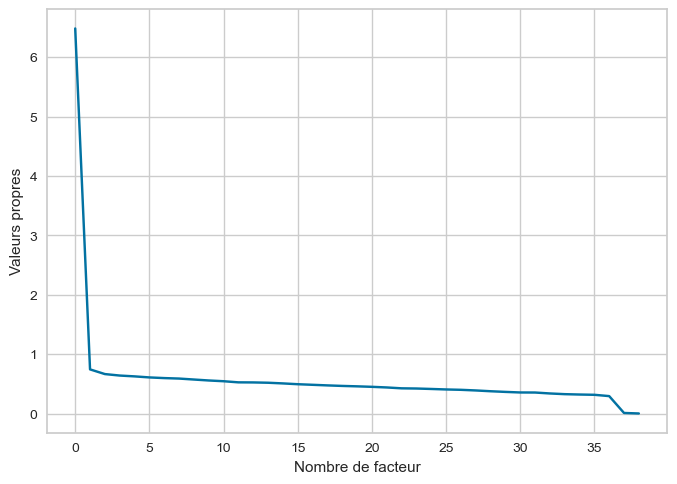

In [37]:
total_j_mean_pca = total_j_mean.drop('j19' ,axis = 1)
pca = PCA()
Coord = pca.fit_transform(total_j_mean_pca)

plt.plot(np.arange(0, 39), pca.explained_variance_)
plt.xlabel('Nombre de facteur')
plt.ylabel('Valeurs propres');



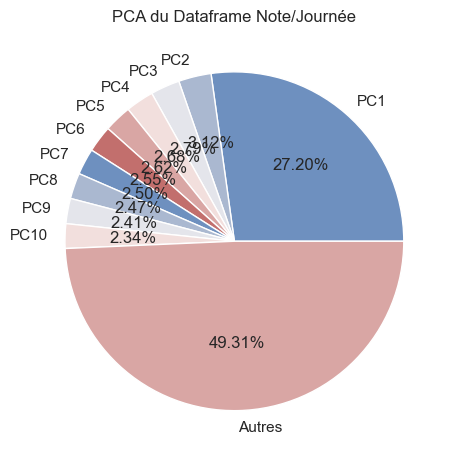

In [177]:
L1 = list(pca.explained_variance_ratio_[0:10])
L1.append(sum(pca.explained_variance_ratio_[10:39]))

plt.pie(L1, labels=['PC1','PC2','PC3','PC4',
                    'PC5','PC6','PC7','PC8',
                    'PC9','PC10','Autres'], 
        autopct='%1.2f%%')
plt.title('PCA du Dataframe Note/Journée')
plt.show()

In [39]:
exp_mean_club_pos = setup(total_j_club_pos, target = 'j19', session_id = 123)

,Description,Value
0,Session id,123
1,Target,j19
2,Target type,Regression
3,Original data shape,"(2415, 146)"
4,Transformed data shape,"(3375, 146)"
5,Transformed train set shape,"(2410, 146)"
6,Transformed test set shape,"(965, 146)"
7,Numeric features,145
8,Preprocess,True
9,Imputation type,simple


In [40]:
best_model_club_pos = exp_mean_club_pos.compare_models()
print(best_model_club_pos)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2692,0.1600,0.3974,0.7059,0.0673,0.0539,1.1730
br,Bayesian Ridge,0.2714,0.1605,0.3980,0.7052,0.0671,0.0544,1.2140
ridge,Ridge Regression,0.2938,0.1802,0.4218,0.6698,0.0705,0.0592,1.0920
et,Extra Trees Regressor,0.3458,0.3129,0.5555,0.4323,0.0928,0.0708,1.1320
huber,Huber Regressor,0.3626,0.3259,0.5678,0.4032,0.0948,0.0742,1.0950
rf,Random Forest Regressor,0.3514,0.3330,0.5728,0.3964,0.0957,0.0720,1.1360
gbr,Gradient Boosting Regressor,0.3642,0.3357,0.5741,0.3940,0.0956,0.0742,1.1160
xgboost,Extreme Gradient Boosting,0.3834,0.3565,0.5928,0.3531,0.0987,0.0782,1.0980
lightgbm,Light Gradient Boosting Machine,0.3786,0.3556,0.5926,0.3521,0.0989,0.0775,1.0950
knn,K Neighbors Regressor,0.3849,0.3850,0.6165,0.2979,0.1031,0.0790,1.1240


LinearRegression(n_jobs=-1)


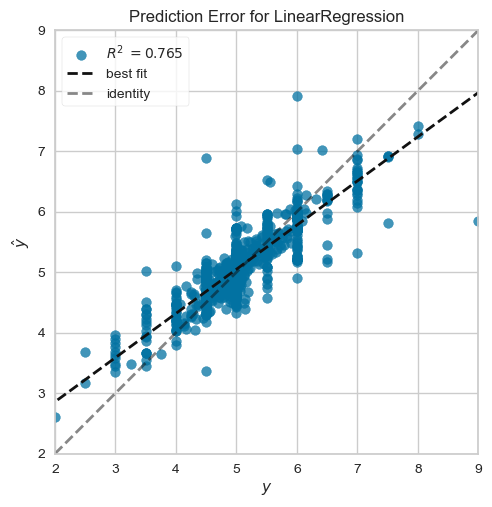

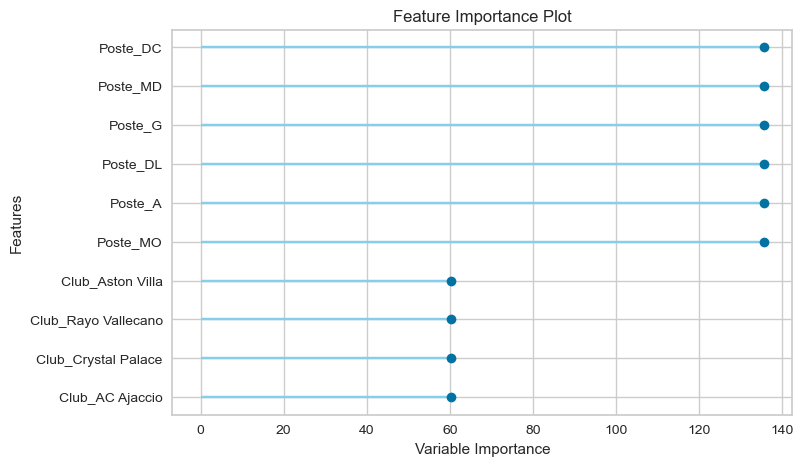

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.2416,0.1336,0.3655,0.7647,0.0599,0.0491


,Note,Note 1 an,j1,j2,j3,j4,j5,j6,j7,j8,...,Club_Udinese,Club_Valencia,Club_Valenciennes,Club_Valladolid,Club_Verona,Club_Villarreal,Club_West Ham,Club_Wolverhampton,j19,prediction_label
Joueur,,,,,,,,,,,,,,,,,,,,,
Méndez Brais,6.12,5.77,5.5,4.00,7.00,6.00,6.0,6.5,7.00,7.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.12,6.044342
Dunk Lewis,4.95,5.00,5.5,6.00,6.00,5.50,3.0,5.5,4.95,4.95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.00,5.850739
Pérez Nehuén,5.09,4.83,4.0,3.50,5.09,5.09,6.5,5.5,5.50,5.50,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.00,6.227203
Mayoral Borja,4.72,4.86,3.0,3.50,5.00,3.00,4.0,5.5,6.50,4.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.72,5.066986
Sambi Lokonga Albert,5.08,5.04,5.0,5.08,5.00,5.08,5.5,5.0,5.08,5.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.08,4.901306
Danilo,5.42,5.45,5.5,5.00,5.50,5.00,5.0,5.0,4.50,5.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.00,5.954803
Danilo,5.42,5.45,5.5,5.00,5.50,5.00,5.0,5.0,4.50,5.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.00,5.975922
Danilo,6.00,6.00,6.0,6.00,6.00,6.00,6.0,6.0,6.00,6.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.00,5.945618
Danilo,6.00,6.00,6.0,6.00,6.00,6.00,6.0,6.0,6.00,6.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.00,5.945618


In [41]:
exp_mean_club_pos.plot_model(best_model_club_pos, plot = 'error')
exp_mean_club_pos.plot_model(best_model_club_pos, plot = 'feature')
exp_mean_club_pos.predict_model(best_model_club_pos).head(10)

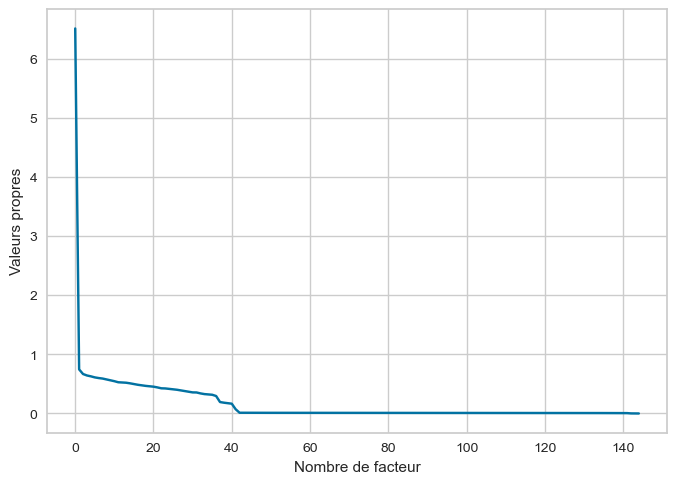

In [42]:
total_pos_club_pca = total_j_club_pos.drop('j19' ,axis = 1)
pca = PCA()
Coord = pca.fit_transform(total_pos_club_pca)

plt.plot(np.arange(0, 145), pca.explained_variance_)
plt.xlabel('Nombre de facteur')
plt.ylabel('Valeurs propres');

In [43]:
exp_G = RegressionExperiment()
exp_G.setup(G_j_mean, target = 'j19', session_id = 123)

,Description,Value
0,Session id,123
1,Target,j19
2,Target type,Regression
3,Original data shape,"(159, 40)"
4,Transformed data shape,"(159, 40)"
5,Transformed train set shape,"(111, 40)"
6,Transformed test set shape,"(48, 40)"
7,Numeric features,39
8,Preprocess,True
9,Imputation type,simple


In [44]:
best_model_G = exp_G.compare_models()
print(best_model_G)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4975,0.5238,0.7054,0.4166,0.1145,0.0981,1.0720
br,Bayesian Ridge,0.5976,0.7867,0.8691,0.1202,0.1458,0.1259,1.0810
knn,K Neighbors Regressor,0.6261,0.8259,0.8769,0.1128,0.1482,0.1343,1.0810
rf,Random Forest Regressor,0.6280,0.8530,0.8878,0.0839,0.1495,0.1332,1.1030
ada,AdaBoost Regressor,0.6510,0.8560,0.8964,0.0726,0.1509,0.1377,1.1280
et,Extra Trees Regressor,0.6241,0.8615,0.9011,0.0611,0.1509,0.1320,1.1080
omp,Orthogonal Matching Pursuit,0.6640,0.8828,0.9133,0.0318,0.1529,0.1391,1.0550
lightgbm,Light Gradient Boosting Machine,0.7063,0.9421,0.9452,-0.0317,0.1584,0.1490,1.0850
gbr,Gradient Boosting Regressor,0.7028,0.9678,0.9561,-0.0830,0.1606,0.1472,1.1160
ridge,Ridge Regression,0.7177,0.9405,0.9579,-0.1153,0.1571,0.1443,1.0690


LinearRegression(n_jobs=-1)


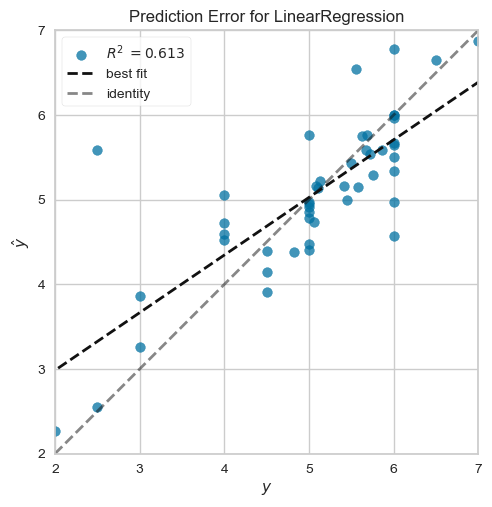

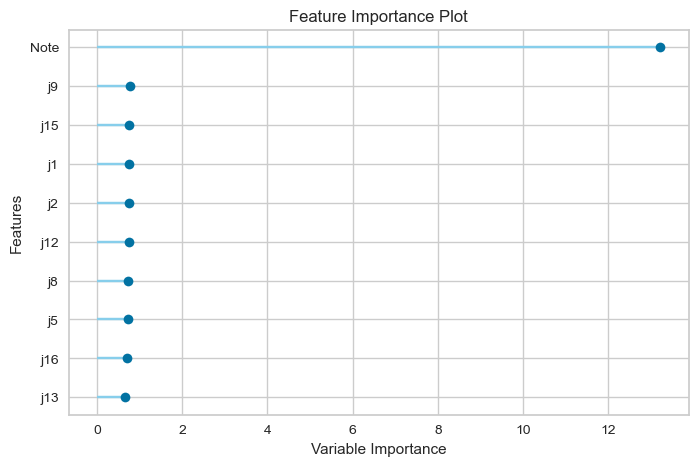

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.4304,0.4422,0.6649,0.6127,0.1241,0.1021


,Note,Note 1 an,j1,j2,j3,j4,j5,j6,j7,j8,...,j31,j32,j33,j34,j35,j36,j37,j38,j19,prediction_label
Joueur,,,,,,,,,,,,,,,,,,,,,
Rajkovic Predrag,5.56,5.74,8.00,4.50,6.00,5.50,3.50,6.00,5.00,4.50,...,5.00,6.50,6.50,5.00,7.00,4.50,7.00,5.00,5.56,6.546952
Ramsdale Aaron,5.61,5.36,6.00,4.50,5.50,5.50,5.00,4.00,5.61,6.00,...,4.00,4.00,5.50,6.00,5.50,5.00,4.50,5.00,5.50,5.427875
Gazzaniga Paulo,5.69,5.69,5.69,5.69,5.69,5.69,5.69,5.69,5.69,5.69,...,5.69,5.69,5.69,5.69,5.69,5.69,5.69,5.69,5.69,5.760737
Falcone Wladimiro,5.58,5.72,7.00,5.00,5.50,6.50,5.50,4.50,6.00,5.00,...,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,4.00,4.591513
Blázquez Joaquín,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,5.996607
Begovic Asmir,7.00,6.17,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,7.00,7.00,7.00,7.00,7.00,7.00,7.00,4.00,7.00,6.877529
Silvestri Marco,5.26,5.32,3.00,7.00,6.00,6.00,6.00,5.00,6.00,5.00,...,5.50,6.00,6.00,4.00,5.00,6.00,4.50,5.26,6.00,5.338234
Courtois Thibaut,5.58,5.68,6.50,5.00,6.00,6.00,5.00,6.00,5.58,5.58,...,5.50,4.50,5.50,7.00,5.58,5.50,5.58,6.00,5.58,5.143372
Quilichini Ghjuvanni,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,5.996607


In [45]:
exp_G.plot_model(best_model_G, plot = 'error')
exp_G.plot_model(best_model_G, plot = 'feature')
exp_G.predict_model(best_model_G).head(10)

In [46]:
exp_D = RegressionExperiment()
exp_D.setup(D_j_mean, target = 'j19', session_id = 123)

,Description,Value
0,Session id,123
1,Target,j19
2,Target type,Regression
3,Original data shape,"(836, 40)"
4,Transformed data shape,"(836, 40)"
5,Transformed train set shape,"(585, 40)"
6,Transformed test set shape,"(251, 40)"
7,Numeric features,39
8,Preprocess,True
9,Imputation type,simple


In [47]:
best_model_D = exp_D.compare_models()
print(best_model_D)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2114,0.1175,0.3364,0.7880,0.0584,0.0447,1.0760
lr,Linear Regression,0.2099,0.1175,0.3365,0.7877,0.0584,0.0443,1.0900
huber,Huber Regressor,0.3126,0.2249,0.4672,0.5858,0.0839,0.0676,1.0850
ridge,Ridge Regression,0.3112,0.2479,0.4910,0.5580,0.0882,0.0688,1.0810
et,Extra Trees Regressor,0.4020,0.4261,0.6441,0.2381,0.1144,0.0893,1.0790
rf,Random Forest Regressor,0.4103,0.4299,0.6476,0.2246,0.1154,0.0911,1.0910
gbr,Gradient Boosting Regressor,0.4310,0.4376,0.6523,0.2112,0.1162,0.0951,1.0870
lightgbm,Light Gradient Boosting Machine,0.4563,0.4456,0.6592,0.1985,0.1176,0.1003,1.0790
knn,K Neighbors Regressor,0.4329,0.4665,0.6748,0.1657,0.1195,0.0959,1.0790
ada,AdaBoost Regressor,0.5015,0.4837,0.6893,0.1236,0.1211,0.1085,1.0880


BayesianRidge()


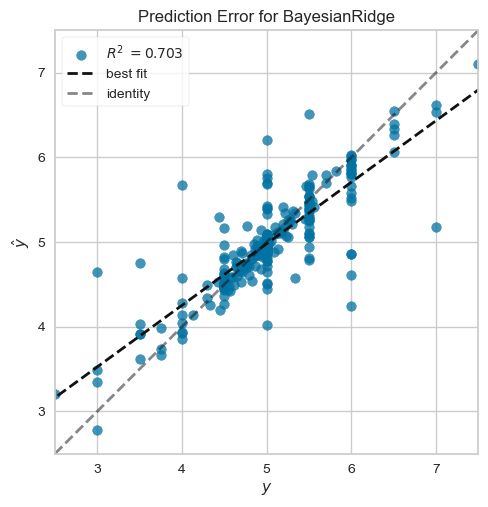

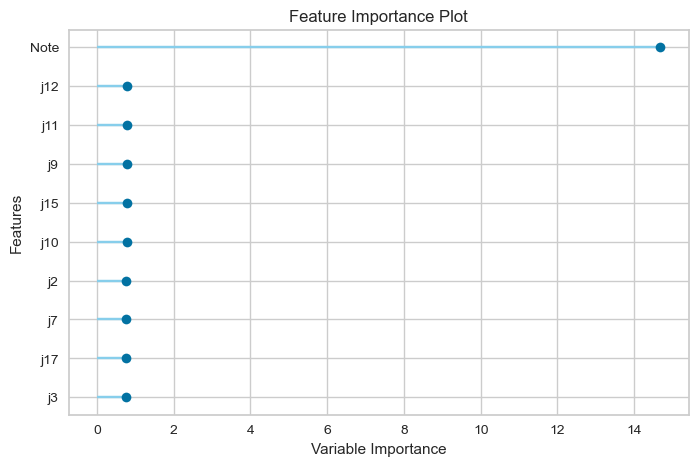

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.2149,0.1419,0.3766,0.7032,0.0641,0.0444


,Note,Note 1 an,j1,j2,j3,j4,j5,j6,j7,j8,...,j31,j32,j33,j34,j35,j36,j37,j38,j19,prediction_label
Joueur,,,,,,,,,,,,,,,,,,,,,
Sánchez Davinson,5.05,5.24,5.05,5.05,6.00,6.50,5.00,5.05,5.05,4.50,...,5.05,5.05,5.05,5.00,5.05,5.00,7.00,6.00,5.05,5.006807
Caufriez Maximiliano,5.17,5.17,5.17,5.17,5.17,5.17,5.17,6.00,5.00,4.00,...,5.17,5.17,5.17,5.17,5.17,5.17,5.17,5.17,5.00,5.094220
Jeanvier Julian,4.46,4.46,3.00,6.00,5.50,4.46,4.46,4.46,4.46,4.46,...,4.46,4.46,4.46,4.46,4.46,4.46,4.46,4.46,6.00,5.666284
Diop Issa,5.25,5.20,5.25,5.25,5.25,5.00,5.25,5.25,5.25,4.00,...,5.25,4.50,5.00,5.25,5.25,5.25,5.25,5.25,5.00,4.896834
Burn Dan,5.28,5.35,7.00,5.50,4.00,5.00,4.50,5.00,5.28,5.50,...,3.00,6.00,5.50,6.00,5.50,3.00,6.00,5.00,5.00,5.692647
Ouattara Kassoum,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.988172
Angileri Fabrizio,4.00,4.00,3.00,3.00,4.00,2.00,4.50,4.00,4.00,5.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.938005
Alba Jordi,5.46,5.65,5.00,5.50,5.46,5.50,5.46,5.46,5.50,5.00,...,6.50,5.00,5.00,6.00,8.00,5.00,5.46,4.50,5.46,5.661651
Viti Mattia,4.64,4.92,4.64,4.64,4.64,3.50,5.50,5.00,4.64,4.64,...,5.00,5.50,4.64,4.50,4.50,4.64,4.64,6.00,4.64,4.699025


In [48]:
exp_D.plot_model(best_model_D, plot = 'error')
exp_D.plot_model(best_model_D, plot = 'feature')
exp_D.predict_model(best_model_D).head(10)

,Description,Value
0,Session id,123
1,Target,j19
2,Target type,Regression
3,Original data shape,"(903, 40)"
4,Transformed data shape,"(903, 40)"
5,Transformed train set shape,"(632, 40)"
6,Transformed test set shape,"(271, 40)"
7,Numeric features,39
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2371,0.1512,0.3825,0.7259,0.0602,0.0459,1.0800
lr,Linear Regression,0.2351,0.1511,0.3820,0.7256,0.0600,0.0454,1.0740
huber,Huber Regressor,0.3017,0.2167,0.4600,0.6080,0.0743,0.0590,1.0890
ridge,Ridge Regression,0.3295,0.2634,0.5089,0.5316,0.0820,0.0651,1.0840
et,Extra Trees Regressor,0.4123,0.4460,0.6629,0.2060,0.1068,0.0821,1.0980
rf,Random Forest Regressor,0.4148,0.4501,0.6669,0.1908,0.1072,0.0826,1.1040
lightgbm,Light Gradient Boosting Machine,0.4549,0.4625,0.6764,0.1538,0.1085,0.0897,1.0900
omp,Orthogonal Matching Pursuit,0.4621,0.4829,0.6913,0.1299,0.1112,0.0916,1.0820
gbr,Gradient Boosting Regressor,0.4399,0.4840,0.6917,0.1259,0.1112,0.0871,1.0730
knn,K Neighbors Regressor,0.4495,0.5033,0.7047,0.0888,0.1129,0.0889,1.0660


BayesianRidge()


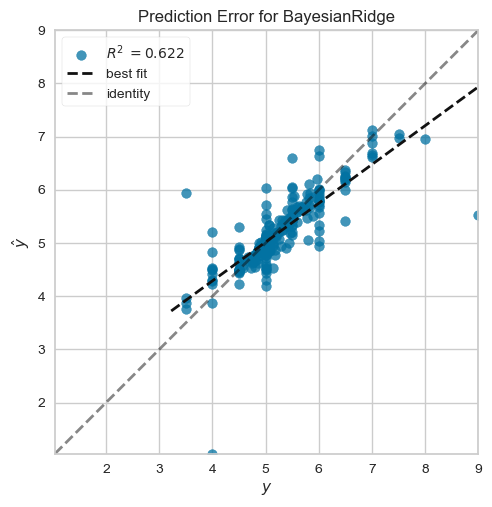

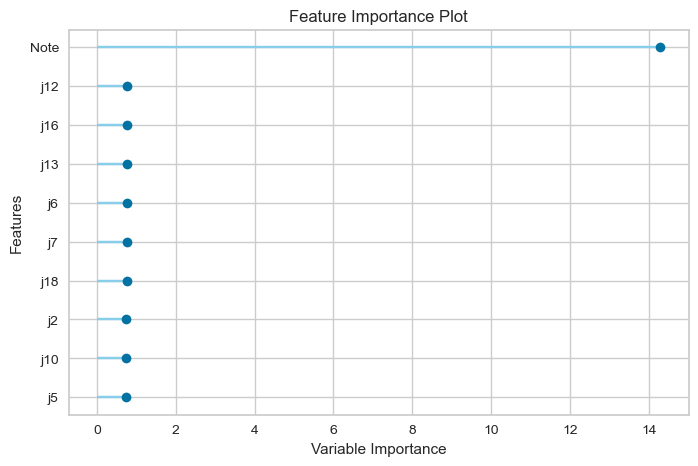

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.2243,0.1892,0.4349,0.6223,0.0815,0.0435


,Note,Note 1 an,j1,j2,j3,j4,j5,j6,j7,j8,...,j31,j32,j33,j34,j35,j36,j37,j38,j19,prediction_label
Joueur,,,,,,,,,,,,,,,,,,,,,
Livolant Jérémy,5.66,5.76,7.00,6.50,5.00,6.00,6.50,7.00,6.50,8.50,...,7.50,4.50,6.00,5.00,5.00,7.00,7.50,7.00,4.50,4.864998
Bonnet Alexandre,5.07,5.03,5.50,3.00,5.50,5.00,6.00,5.00,7.00,5.00,...,5.00,7.00,5.50,6.00,5.50,4.50,6.00,5.00,4.50,4.918472
Toni Villa,5.22,5.22,4.50,5.22,5.00,5.00,5.00,4.50,5.22,5.00,...,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.22,5.207173
Camblan Axel,4.67,4.67,4.67,4.67,4.67,4.67,4.67,4.67,4.67,4.67,...,4.67,4.67,4.67,4.67,4.67,4.67,4.67,4.67,5.00,4.889070
Cruz Juan,5.20,5.20,5.20,5.20,5.20,5.20,5.20,5.20,5.20,5.20,...,5.20,5.20,5.20,5.20,5.20,5.20,5.20,5.20,5.20,5.151019
Battaglia Rodrigo,4.92,4.94,5.00,3.50,5.50,5.50,4.50,4.92,4.92,5.00,...,5.00,4.92,4.50,4.50,4.92,6.00,5.50,7.00,5.00,5.149445
Bellegarde Jean-Ricner,5.39,5.51,4.50,5.50,5.50,5.00,5.50,5.50,6.50,3.00,...,5.00,5.00,7.00,5.00,5.50,6.00,5.50,5.50,5.00,4.831668
Maddison James,5.89,6.12,6.00,6.00,4.50,5.89,5.50,3.50,5.89,6.00,...,7.00,6.00,5.00,5.50,5.89,5.89,8.50,8.00,5.89,5.509017
Touré Madou,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.994920


In [49]:
exp_M = RegressionExperiment()
exp_M.setup(M_j_mean, target = 'j19', session_id = 123)

best_model_M = exp_M.compare_models()
print(best_model_M)

exp_M.plot_model(best_model_M, plot = 'error')
exp_M.plot_model(best_model_M, plot = 'feature')
exp_M.predict_model(best_model_M).head(10)

,Description,Value
0,Session id,123
1,Target,j19
2,Target type,Regression
3,Original data shape,"(461, 40)"
4,Transformed data shape,"(461, 40)"
5,Transformed train set shape,"(322, 40)"
6,Transformed test set shape,"(139, 40)"
7,Numeric features,39
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.3104,0.2573,0.4933,0.6485,0.0829,0.0649,1.0810
lr,Linear Regression,0.3141,0.2852,0.5125,0.6288,0.0851,0.0656,1.0840
br,Bayesian Ridge,0.3196,0.2852,0.5159,0.6240,0.0854,0.0665,1.0570
ridge,Ridge Regression,0.4452,0.4861,0.6902,0.3175,0.1125,0.0912,1.0700
et,Extra Trees Regressor,0.5025,0.6546,0.8000,0.1386,0.1275,0.1015,1.0950
knn,K Neighbors Regressor,0.5042,0.6735,0.8080,0.1283,0.1289,0.1013,1.0780
rf,Random Forest Regressor,0.5038,0.6761,0.8132,0.1154,0.1297,0.1020,1.0840
omp,Orthogonal Matching Pursuit,0.5532,0.7105,0.8342,0.0483,0.1335,0.1114,1.0900
ada,AdaBoost Regressor,0.5698,0.7596,0.8607,0.0253,0.1371,0.1155,1.0860
lightgbm,Light Gradient Boosting Machine,0.5715,0.7594,0.8571,0.0228,0.1369,0.1149,1.0630


HuberRegressor()


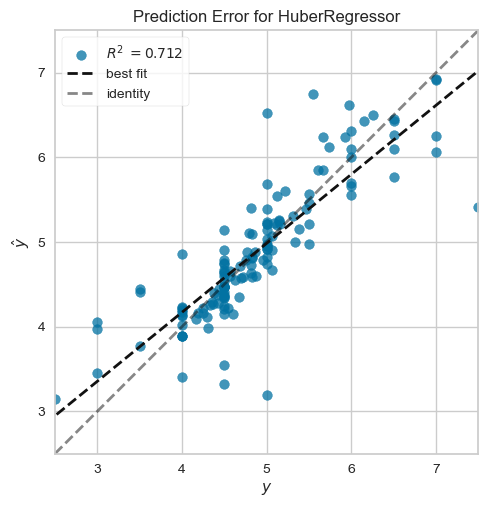

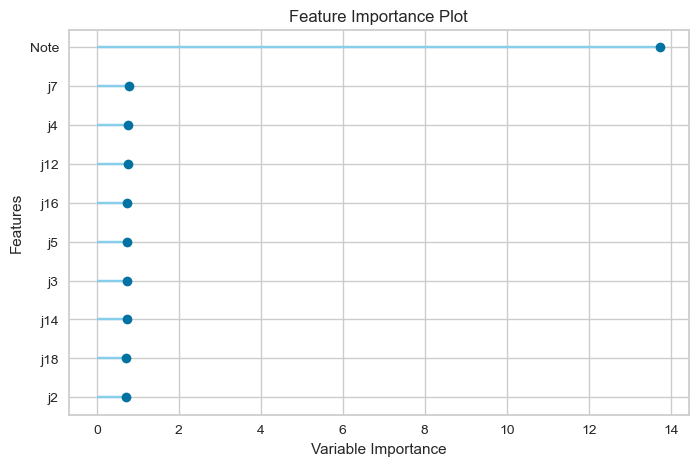

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.2873,0.2020,0.4495,0.7116,0.0786,0.0611


,Note,Note 1 an,j1,j2,j3,j4,j5,j6,j7,j8,...,j31,j32,j33,j34,j35,j36,j37,j38,j19,prediction_label
Joueur,,,,,,,,,,,,,,,,,,,,,
Sánchez Alexis,5.41,5.16,5.41,4.5,5.0,8.0,4.00,6.5,6.0,4.50,...,5.41,5.41,6.50,4.50,5.00,6.00,4.00,5.41,6.50,6.100760
Maja Josh,5.61,5.50,4.50,5.0,6.0,5.0,4.00,7.0,8.0,5.00,...,5.61,5.61,5.61,5.61,5.61,5.61,5.61,5.61,6.00,6.305375
Ripart Renaud,5.12,5.16,5.00,4.5,5.0,7.0,5.00,4.5,4.5,7.00,...,4.50,5.50,5.00,5.00,5.50,5.50,4.00,6.50,5.12,5.199223
Kristoffersen Julian,4.00,4.00,4.00,4.0,4.0,4.0,4.00,4.0,4.0,4.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.890578
Vlahovic Dusan,5.55,5.28,7.50,4.0,6.5,6.0,5.55,5.0,4.5,7.00,...,5.00,6.50,6.00,4.00,4.00,4.00,6.00,4.00,5.55,6.743334
Budimir Ante,4.61,4.94,4.61,6.0,4.5,4.0,5.00,4.0,4.5,4.61,...,6.00,6.00,6.50,6.00,6.50,4.50,3.50,4.00,4.50,4.782281
Sissoko Ibrahim,5.22,5.27,4.00,4.0,4.0,6.0,5.50,4.5,7.0,6.00,...,4.50,4.50,5.22,6.50,4.50,5.22,5.22,5.22,3.50,4.406731
Merdji Yanis,4.50,4.75,7.00,4.5,4.0,4.5,3.50,4.5,4.5,4.00,...,6.00,4.50,4.50,4.50,4.50,4.50,4.50,4.50,4.00,4.236754
Mateo Joseph,4.50,4.50,4.50,4.5,4.5,4.5,4.50,4.5,4.5,4.50,...,4.50,4.50,4.50,4.50,4.50,4.50,4.50,4.50,4.50,4.465799


In [50]:
exp_A = RegressionExperiment()
exp_A.setup(A_j_mean, target = 'j19', session_id = 123)

best_model_A = exp_A.compare_models()
print(best_model_A)

exp_A.plot_model(best_model_A, plot = 'error')
exp_A.plot_model(best_model_A, plot = 'feature')
exp_A.predict_model(best_model_A).head(10)

In [51]:
target = total_j_mean.j19
feats = total_j_mean.drop('j19', axis = 1)

target_s = total_j_saison_m.j19
feats_s = total_j_saison_m.drop('j19', axis = 1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.2, random_state = 42)
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LR_predictions_train1 = regressor1.predict(X_train)
LR_predictions_test1 = regressor1.predict(X_test)

print("Score du jeu d'entrainement :", regressor1.score(X_train, y_train))
print("Score du jeu Test :", regressor1.score(X_test, y_test))

Score du jeu d'entrainement : 0.7732626899388734
Score du jeu Test : 0.7936508588340907


In [53]:
#Calcul du modèle LinearRegressor et de ses métriques. sur le jeu de donnée fillna = mean

LR_predictions_train1 = regressor1.predict(X_train)
LR_predictions_test1 = regressor1.predict(X_test)

LR_mse_train1 = mean_squared_error(y_train, LR_predictions_train1)
LR_mse_test1 = mean_squared_error(y_test, LR_predictions_test1)

LR_rmse_train1 = mean_squared_error(y_train, LR_predictions_train1, squared = False)
LR_rmse_test1 = mean_squared_error(y_test, LR_predictions_test1, squared = False)

LR_mae_train1 = mean_absolute_error(y_train, LR_predictions_train1)
LR_mae_test1 = mean_absolute_error(y_test, LR_predictions_test1)


total_test_LR1 = pd.DataFrame(y_test)
total_test_LR1['pred'] = LR_predictions_test1.tolist()
total_test_LR1['var'] = total_test_LR1.j19 - total_test_LR1.pred
total_test_LR1['range'] = range(1, 473)
total_test_LR1['note_arr'] = total_test_LR1.j19.round(0)


In [54]:
#Calcul du modèle RandomForestRegressor et de ses métriques. sur le jeu de donnée fillna = mean
randomreg1 = RandomForestRegressor()
randomreg1.fit(X_train, y_train)

print("Score du jeu d'entrainement :", randomreg1.score(X_train, y_train))
print("Score du jeu Test :", randomreg1.score(X_test, y_test))

RFR_predictions_train1 = randomreg1.predict(X_train)
RFR_predictions_test1 = randomreg1.predict(X_test)

RFR_mse_train1 = mean_squared_error(y_train, RFR_predictions_train1)
RFR_mse_test1 = mean_squared_error(y_test, RFR_predictions_test1)

RFR_rmse_train1 = mean_squared_error(y_train, RFR_predictions_train1, squared = False)
RFR_rmse_test1 = mean_squared_error(y_test, RFR_predictions_test1, squared = False)

RFR_mae_train1 = mean_absolute_error(y_train, RFR_predictions_train1)
RFR_mae_test1 = mean_absolute_error(y_test, RFR_predictions_test1)

total_test_RFR1 = pd.DataFrame(y_test)
total_test_RFR1['pred'] = RFR_predictions_test1.tolist()
total_test_RFR1['var'] = total_test_RFR1.j19 - total_test_RFR1.pred
total_test_RFR1['range'] = range(1, 473)
total_test_RFR1['note_arr'] = total_test_RFR1.j19.round(0)



Score du jeu d'entrainement : 0.8968398831579409
Score du jeu Test : 0.28618157152275303


In [55]:
#Calcul du modèle DecisionTreeRegressor et de ses métriques. sur le jeu de donnée fillna = mean
dtr1 = DecisionTreeRegressor()
dtr1.fit(X_train, y_train)

print("Score du jeu d'entrainement :", dtr1.score(X_train, y_train))
print("Score du jeu Test :", dtr1.score(X_test, y_test))


DTR_predictions_train1 = dtr1.predict(X_train)
DTR_predictions_test1 = dtr1.predict(X_test)

DTR_mse_train1 = mean_squared_error(y_train, DTR_predictions_train1)
DTR_mse_test1 = mean_squared_error(y_test, DTR_predictions_test1)

DTR_rmse_train1 = mean_squared_error(y_train, DTR_predictions_train1, squared = False)
DTR_rmse_test1 = mean_squared_error(y_test, DTR_predictions_test1, squared = False)

DTR_mae_train1 = mean_absolute_error(y_train, DTR_predictions_train1)
DTR_mae_test1 = mean_absolute_error(y_test, DTR_predictions_test1)

total_test_DTR1 = pd.DataFrame(y_test)
total_test_DTR1['pred'] = DTR_predictions_test1.tolist()
total_test_DTR1['var'] = total_test_DTR1.j19 - total_test_DTR1.pred
total_test_DTR1['range'] = range(1, 473)
total_test_DTR1['note_arr'] = total_test_DTR1.j19.round(0)



Score du jeu d'entrainement : 1.0
Score du jeu Test : -0.5396514787182856


In [56]:

xg_reg1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg1.fit(X_train,y_train)

XG_predictions_train1 = xg_reg1.predict(X_train)
XG_predictions_test1 = xg_reg1.predict(X_test)

print("Score du jeu d'entrainement :", xg_reg1.score(X_train, y_train))
print("Score du jeu Test :", xg_reg1.score(X_test, y_test))

XG_predictions_train1 = xg_reg1.predict(X_train)
XG_predictions_test1 = xg_reg1.predict(X_test)

XG_mse_train1 = mean_squared_error(y_train, XG_predictions_train1)
XG_mse_test1 = mean_squared_error(y_test, XG_predictions_test1)

XG_rmse_train1 = mean_squared_error(y_train, XG_predictions_train1, squared = False)
XG_rmse_test1 = mean_squared_error(y_test, XG_predictions_test1, squared = False)

XG_mae_train1 = mean_absolute_error(y_train, XG_predictions_train1)
XG_mae_test1 = mean_absolute_error(y_test, XG_predictions_test1)

Score du jeu d'entrainement : -3.6719449472356835
Score du jeu Test : -4.830338891166204


In [57]:
#Rassemblement des métriques pour comparaison.
data = {'LinearReg': [LR_mse_train1, LR_mse_test1, LR_rmse_train1, LR_rmse_test1, LR_mae_train1, LR_mae_test1],
            'RandomForestReg': [RFR_mse_train1, RFR_mse_test1, RFR_rmse_train1, RFR_rmse_test1, RFR_mae_train1, RFR_mae_test1],
            'DecisionTreeReg': [DTR_mse_train1, DTR_mse_test1, DTR_rmse_train1, DTR_rmse_test1, DTR_mae_train1, DTR_mae_test1],
       'XG_Boost' : [XG_mse_train1, XG_mse_test1, XG_rmse_train1, XG_rmse_test1, XG_mae_train1, XG_mae_test1]}

tb_score_mean = pd.DataFrame(data, index = ['MSE_train', 'MSE_test', 'RMSE_train', 'RMSE_test', 'MAE_train', 'MAE_test'])
tb_score_mean
#DecisiontTreeRegressor obtient le meilleur score, uniquement sur le jeu d'entrainement.
#Pour le reste, c'est le Linear Regressor qui est le plus performant.

,LinearReg,RandomForestReg,DecisionTreeReg,XG_Boost
MSE_train,0.152240,0.069266,2.926352e-33,3.136927
MSE_test,0.109313,0.378142,8.156233e-01,3.088595
RMSE_train,0.390180,0.263184,5.409577e-17,1.771137
RMSE_test,0.330624,0.614933,9.031187e-01,1.757440
MAE_train,0.224904,0.161838,3.294780e-18,1.625431
MAE_test,0.199203,0.359360,5.555508e-01,1.632126


In [58]:
#Calcul des modèles de régression pour fillna = last.
target_l = total_j_last.j19
feats_l = total_j_last.drop('j19', axis = 1)

In [59]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(feats_l, target_l, test_size = 0.2, random_state = 42)
regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

LR_predictions_train2 = regressor2.predict(X_train2)
LR_predictions_test2 = regressor2.predict(X_test2)

print("Score du jeu d'entrainement :", regressor2.score(X_train2, y_train2))
print("Score du jeu Test :", regressor2.score(X_test2, y_test2))

LR_predictions_train2 = regressor2.predict(X_train2)
LR_predictions_test2 = regressor2.predict(X_test2)

LR_mse_train2 = mean_squared_error(y_train2, LR_predictions_train2)
LR_mse_test2 = mean_squared_error(y_test2, LR_predictions_test2)

LR_rmse_train2 = mean_squared_error(y_train2, LR_predictions_train2, squared = False)
LR_rmse_test2 = mean_squared_error(y_test2, LR_predictions_test2, squared = False)

LR_mae_train2 = mean_absolute_error(y_train2, LR_predictions_train2)
LR_mae_test2 = mean_absolute_error(y_test2, LR_predictions_test2)

Score du jeu d'entrainement : 0.7732626899388734
Score du jeu Test : 0.7936508588340907


In [60]:
randomreg2 = RandomForestRegressor()
randomreg2.fit(X_train2, y_train2)

print("Score du jeu d'entrainement :", randomreg2.score(X_train2, y_train2))
print("Score du jeu Test :", randomreg2.score(X_test2, y_test2))

RFR_predictions_train2 = randomreg2.predict(X_train2)
RFR_predictions_test2 = randomreg2.predict(X_test2)

RFR_mse_train2 = mean_squared_error(y_train2, RFR_predictions_train2)
RFR_mse_test2 = mean_squared_error(y_test2, RFR_predictions_test2)

RFR_rmse_train2 = mean_squared_error(y_train2, RFR_predictions_train2, squared = False)
RFR_rmse_test2 = mean_squared_error(y_test2, RFR_predictions_test2, squared = False)

RFR_mae_train2 = mean_absolute_error(y_train2, RFR_predictions_train2)
RFR_mae_test2 = mean_absolute_error(y_test2, RFR_predictions_test2)


Score du jeu d'entrainement : 0.8972242293795396
Score du jeu Test : 0.278820342908481


In [61]:
dtr2 = DecisionTreeRegressor()
dtr2.fit(X_train2, y_train2)

print("Score du jeu d'entrainement :", dtr2.score(X_train2, y_train2))
print("Score du jeu Test :", dtr2.score(X_test2, y_test2))


DTR_predictions_train2 = dtr2.predict(X_train2)
DTR_predictions_test2 = dtr2.predict(X_test2)

DTR_mse_train2 = mean_squared_error(y_train2, DTR_predictions_train2)
DTR_mse_test2 = mean_squared_error(y_test2, DTR_predictions_test2)

DTR_rmse_train2 = mean_squared_error(y_train2, DTR_predictions_train2, squared = False)
DTR_rmse_test2 = mean_squared_error(y_test2, DTR_predictions_test2, squared = False)

DTR_mae_train2 = mean_absolute_error(y_train2, DTR_predictions_train2)
DTR_mae_test2 = mean_absolute_error(y_test2, DTR_predictions_test2)

Score du jeu d'entrainement : 1.0
Score du jeu Test : -0.45120877078961974


In [62]:
#Rassemblement des métriques pour comparaison.
data_last = {'LinearReg': [LR_mse_train2, LR_mse_test2, LR_rmse_train2, LR_rmse_test2, LR_mae_train2, LR_mae_test2],
            'RandomForestReg': [RFR_mse_train2, RFR_mse_test2, RFR_rmse_train2, RFR_rmse_test2, RFR_mae_train2, RFR_mae_test2],
            'DecisionTreeReg': [DTR_mse_train2, DTR_mse_test2, DTR_rmse_train2, DTR_rmse_test2, DTR_mae_train2, DTR_mae_test2]}

tb_score_last = pd.DataFrame(data_last, index = ['MSE_train', 'MSE_test', 'RMSE_train', 'RMSE_test', 'MAE_train', 'MAE_test'])
tb_score_last

,LinearReg,RandomForestReg,DecisionTreeReg
MSE_train,0.152240,0.069008,4.598553e-33
MSE_test,0.109313,0.382042,7.687712e-01
RMSE_train,0.390180,0.262693,6.781263e-17
RMSE_test,0.330624,0.618095,8.767960e-01
MAE_train,0.224904,0.162184,5.177511e-18
MAE_test,0.199203,0.363743,5.472458e-01


In [63]:
#Test du LinearRegressor (fillna = mean), sur les journées de la saison actuelle uniquement.
X_train, X_test, y_train, y_test = train_test_split(feats_s, target_s, test_size = 0.20, random_state = 42)
regressor_s = LinearRegression()
regressor_s.fit(X_train, y_train)
predictions_s = regressor_s.predict(X_test)
print("Score du jeu d'entrainement :", regressor_s.score(X_train, y_train))
print("Score du jeu Test :", regressor_s.score(X_test, y_test))

Score du jeu d'entrainement : 0.7458892948327964
Score du jeu Test : 0.7686235901826668


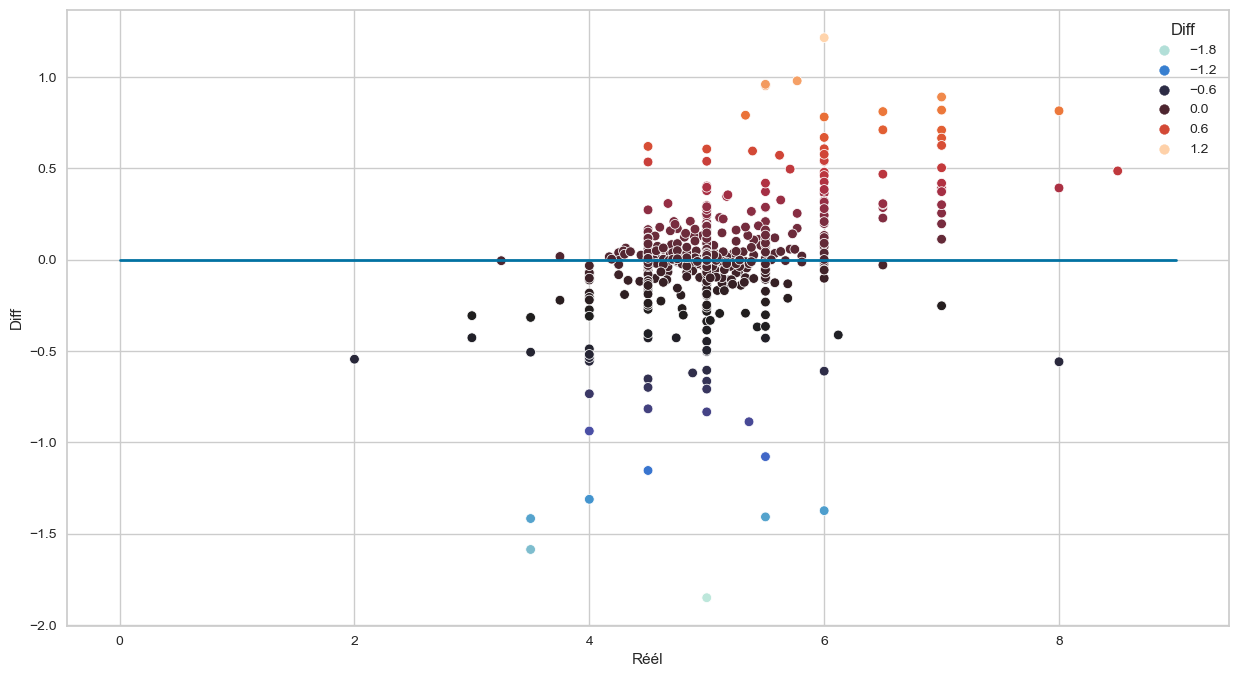

In [64]:
LR1 = {'Réél' : y_test,
       'LR_predictions' : LR_predictions_test1}

df_LR1 = pd.DataFrame(LR1)
df_LR1['Diff'] = df_LR1.Réél - df_LR1.LR_predictions

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'Réél', y = 'Diff',
            data = df_LR1, hue = 'Diff', ax= ax, palette = "icefire")

plt.plot([0,9],[0,0], linewidth=2)